In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [7]:
data = loadmat('ex8data1.mat')
print(type(data))
print(data.keys())

X = data['X']
print(X.shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])
(307, 2)


Text(0.5, 1.0, 'Test dataset')

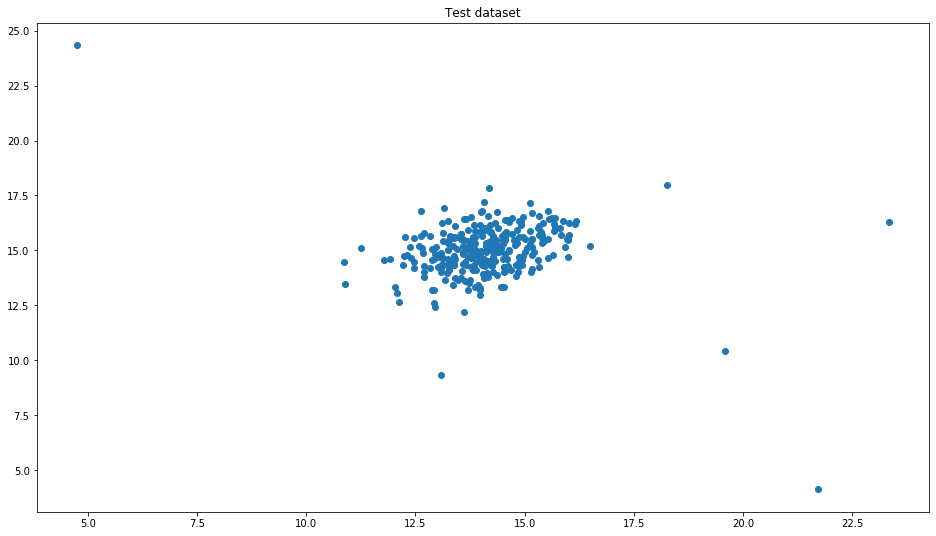

In [19]:
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Test dataset')

(307, 2)
(307, 1)


Text(0.5, 1.0, 'validation dataset')

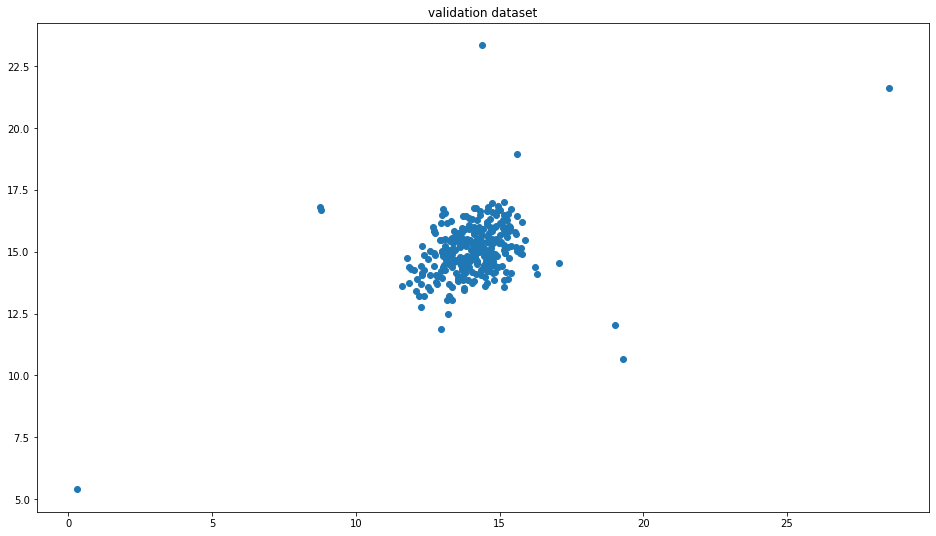

In [18]:
X_val = data['Xval']
y_val = data['yval']

print(X_val.shape)
print(y_val.shape)

plt.figure(figsize=(16, 9))
plt.scatter(X_val[:, 0], X_val[:, 1])
plt.title('validation dataset')

mean = [14.0192978 15.037747 ]
variance = [2.51787    1.62601673]


Text(0.5, 1.0, 'validation dataset')

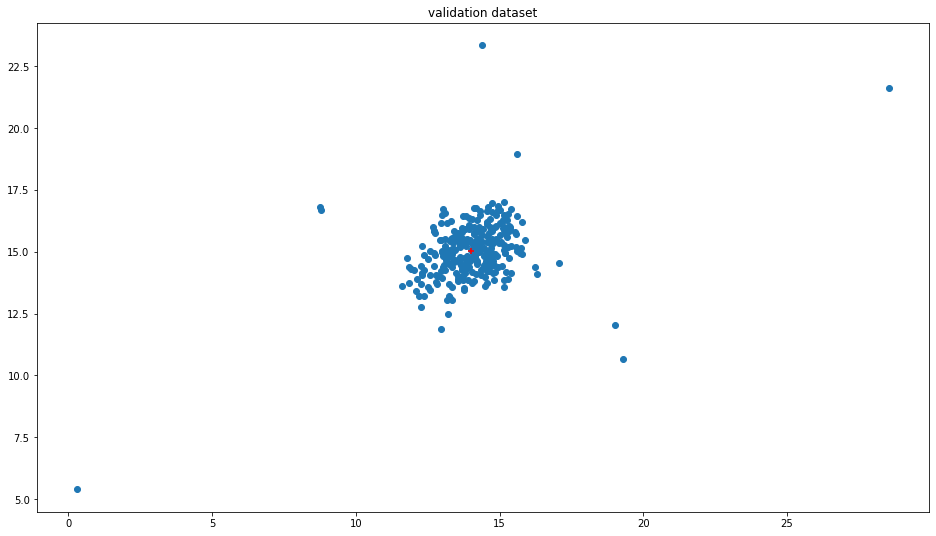

In [27]:
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

mu, sigma = estimate_gaussian(X_val)
print('mean =', mu)
print('variance =', sigma)

plt.figure(figsize=(16, 9))
plt.scatter(X_val[:, 0], X_val[:, 1])
plt.scatter(mu[0], mu[1], marker='+', color='red')
plt.title('validation dataset')

mean = 14.01929779858719 variance = 2.5178699950669103


Text(0.5, 1.0, 'gaussian distribution - Var1')

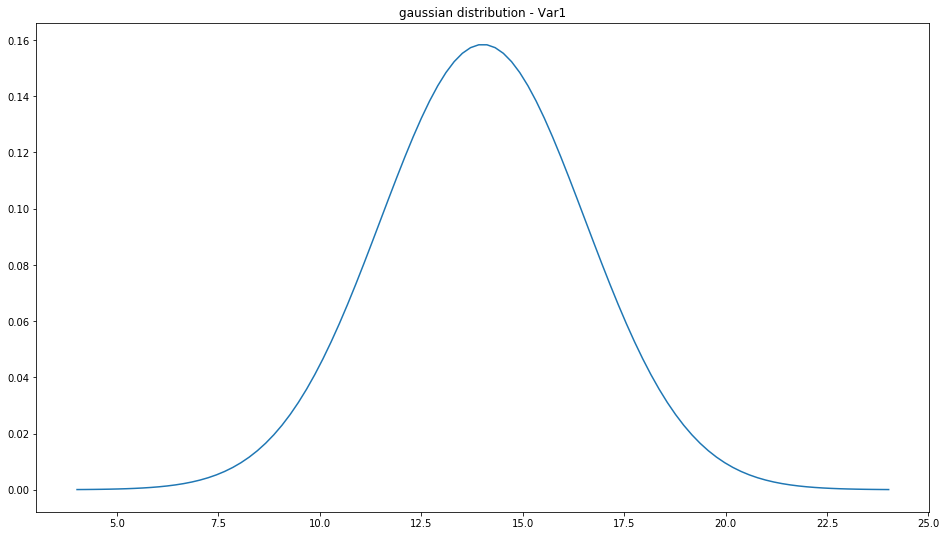

In [49]:
from scipy import stats
dist = stats.norm(mu[0], sigma[0])

xx = np.linspace(mu[0] - 10, mu[0] + 10, 100)
yy = dist.pdf(xx)

print('mean =', mu[0], 'variance =', sigma[0])

plt.figure(figsize=(16, 9))
plt.plot(xx, yy)
plt.title('gaussian distribution - Var1')

mean = 15.037746995886756 variance = 1.6260167253274376


Text(0.5, 1.0, 'gaussian distribution - Var2')

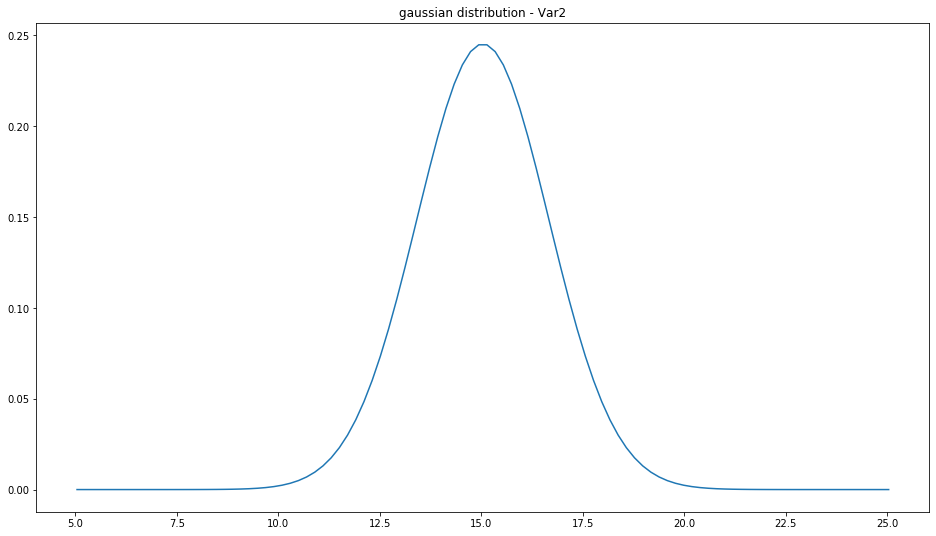

In [48]:
xx = np.linspace(mu[1] - 10, mu[1] + 10, 100)
dist = stats.norm(mu[1], sigma[1])
yy = dist.pdf(xx)

print('mean =', mu[1], 'variance =', sigma[1])
plt.figure(figsize=(16, 9))
plt.plot(xx, yy)
plt.title('gaussian distribution - Var2')

(array([ 4.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  4.,  2.,  1.,  3.,
         2.,  6.,  3.,  3.,  8.,  5.,  3.,  9.,  5.,  3., 18.,  9., 10.,
         9., 11., 10., 17., 11., 20., 18., 22., 24., 35., 21.]),
 array([3.21978712e-16, 7.77422683e-04, 1.55484537e-03, 2.33226805e-03,
        3.10969073e-03, 3.88711341e-03, 4.66453610e-03, 5.44195878e-03,
        6.21938146e-03, 6.99680414e-03, 7.77422683e-03, 8.55164951e-03,
        9.32907219e-03, 1.01064949e-02, 1.08839176e-02, 1.16613402e-02,
        1.24387629e-02, 1.32161856e-02, 1.39936083e-02, 1.47710310e-02,
        1.55484537e-02, 1.63258763e-02, 1.71032990e-02, 1.78807217e-02,
        1.86581444e-02, 1.94355671e-02, 2.02129897e-02, 2.09904124e-02,
        2.17678351e-02, 2.25452578e-02, 2.33226805e-02, 2.41001032e-02,
        2.48775258e-02, 2.56549485e-02, 2.64323712e-02, 2.72097939e-02,
        2.79872166e-02, 2.87646393e-02, 2.95420619e-02, 3.03194846e-

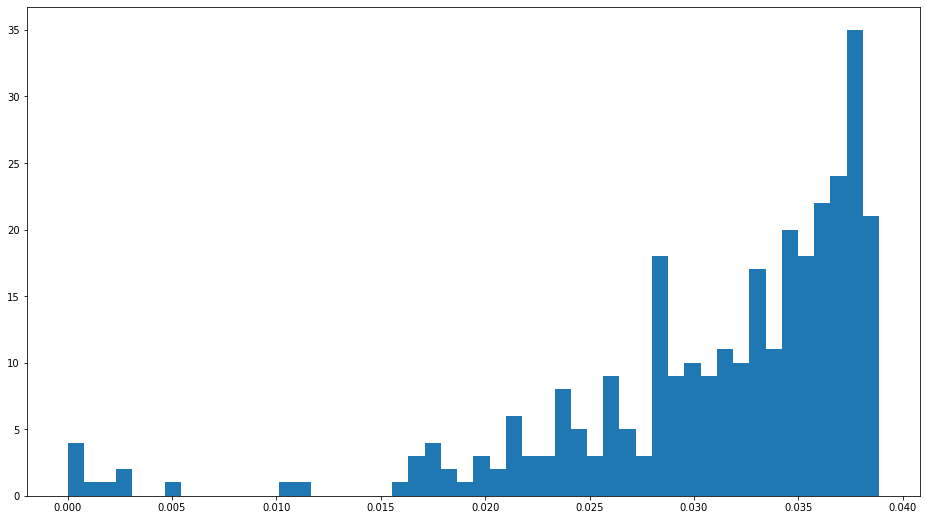

In [65]:
dist1 = stats.norm(mu[0], sigma[0])
dist2 = stats.norm(mu[1], sigma[1])

p_val = dist1.pdf(X_val[:, 0]) * dist2.pdf(X_val[:, 1])

plt.figure(figsize=(16, 9))
plt.hist(p_val, 50)

9


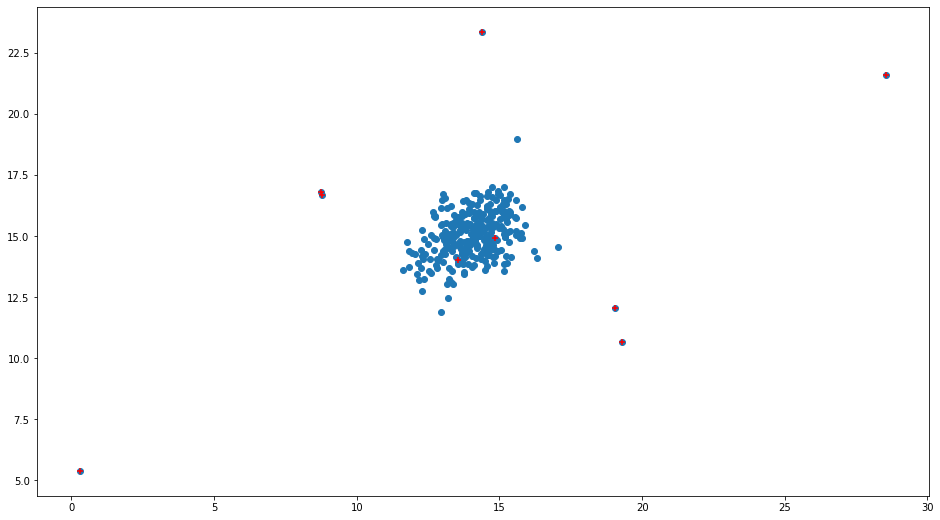

In [101]:
X_val_positive = X_val[y_val == 1]
print(len(X_val_positive))

plt.figure(figsize=(16, 9))
plt.scatter(X_val[:, 0], X_val[:, 1])
plt.scatter(X_val_positive[:, 0], X_val_positive[:, 1], marker='+', color='red')

In [130]:
def select_threshold(p_val, yval):
    best_threshold = 0.0
    best_f1 = 0

    thresholds = np.linspace(0.001, 0.02, 1000)
    print(len(thresholds))
    for threshold in thresholds:
        # print('threshold =', threshold)
        preds = p_val < threshold     
        
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
        print('f1 score = ', f1)
        
        #print('tp =', tp)
        #print('fp =', fp)
        #print('fn =', fn)
        
      
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
        
    return best_threshold, best_f1
    
y_val = y_val.flatten()
print('y_val =', y_val)
threshold, f1 = select_threshold(p_val, y_val)
print('threshold =', threshold)
print('f1 score =', f1)

y_val = [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1]
1000
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.7142857142857143
f1 score =  0.71428571

f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score =  0.7777777777777778
f1 score

f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score =  0.7000000000000001
f1 score

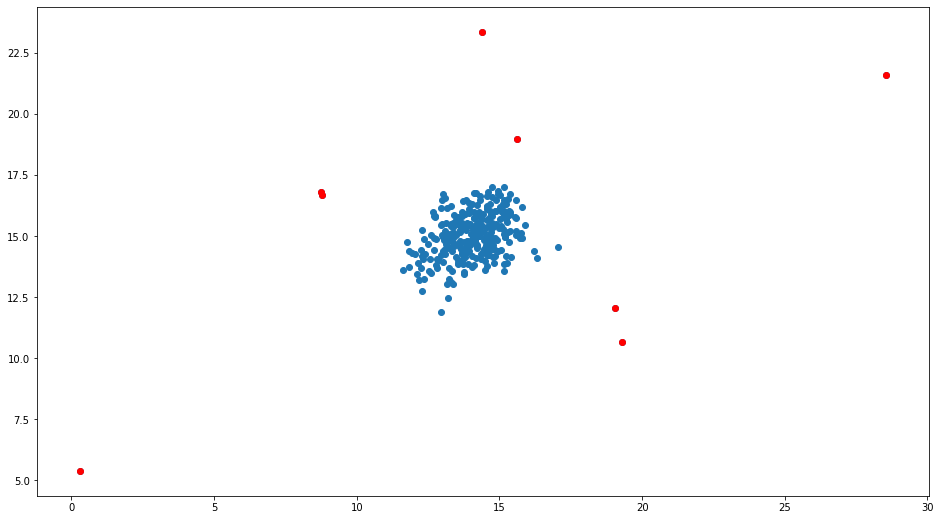

In [154]:
y_hat = pval < threshold

plt.figure(figsize=(16, 9))
plt.scatter(X_val[:, 0], X_val[:, 1])
plt.scatter(X_val[y_hat, 0], X_val[y_hat, 1], color='r')

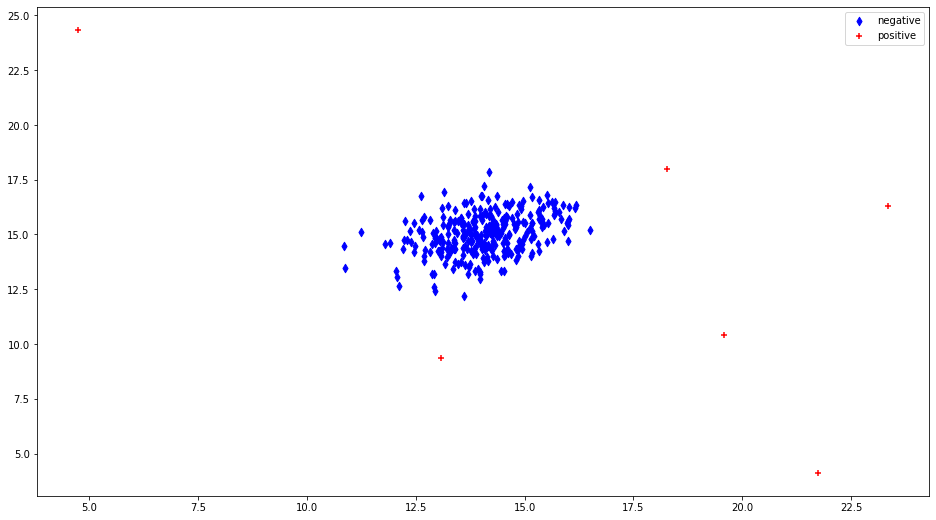

In [153]:
mu, sigma = estimate_gaussian(X)
p_test = stats.norm(mu[0], sigma[0]).pdf(X[:, 0]) * stats.norm(mu[1], sigma[1]).pdf(X[:, 1])

y_hat_postive = p_test < threshold
y_hat_negative = p_test >= threshold

plt.figure(figsize=(16, 9))
plt.scatter(X[y_hat_negative, 0], X[y_hat_negative, 1], marker='d', color='blue', label='negative')
plt.scatter(X[y_hat_postive, 0], X[y_hat_postive, 1], marker='+', color='red', label='positive')
plt.legend()